Name : Jainam Rajput

SAP ID : 60009200022

Div/Batch : K/K1

Pmdarima is a statistical library designed to fill teh void in Pyhon's TS analysis capabilities.

In [2]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 6.4 MB/s 
     |████████████████████████████████| 9.9 MB 38.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [3]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from pmdarima import auto_arima
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r'/content/Daily_Electricity_Consumption.csv', parse_dates = True)

In [5]:
df.head(10)

,Date,usage,cost
0,2016-10-22,4.52,0.60
1,2016-10-23,23.32,4.36
2,2016-10-24,7.16,1.20
3,2016-10-25,8.68,1.60
4,2016-10-26,5.04,0.84
5,2016-10-27,5.32,0.92
6,2016-10-28,4.64,0.72
7,2016-10-29,10.64,1.96
8,2016-10-30,7.44,1.40
9,2016-10-31,8.84,1.64


In [6]:
df['usage'].mean()

11.70630286493861

In [7]:
df.shape

(733, 3)

Perform Exploratory Data Analysis using line, histogram and kernel density estimation (KDE) of the closing price of the stocks. EDA is the process of using a graphical representation to discover and investigate patterns within data.


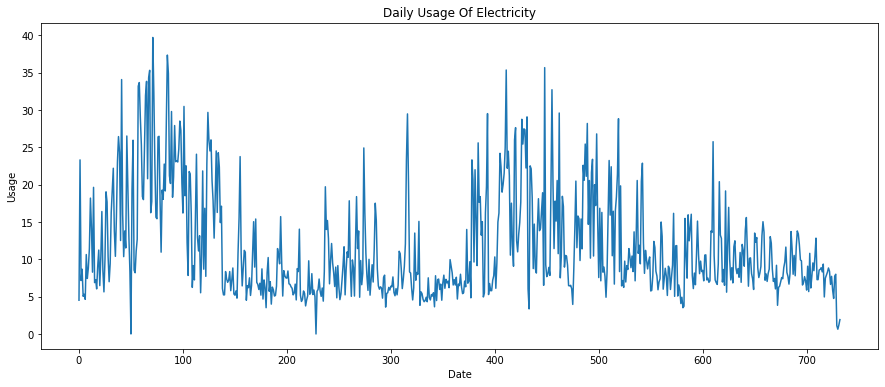

In [8]:
df["usage"].plot(figsize=(15, 6))
plt.xlabel("Date")
plt.ylabel("Usage")
plt.title("Daily Usage Of Electricity")
plt.show()

KDE is a nonparametric way to estimate the probability density function (PDF) of a random variable.

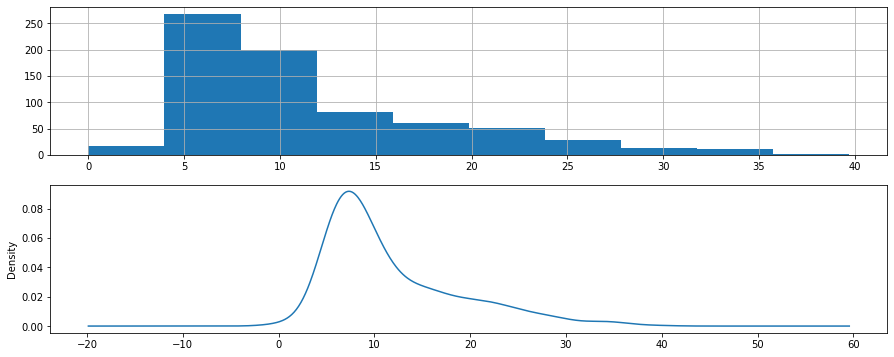

In [9]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["usage"].hist()
plt.subplot(212)
df["usage"].plot(kind='kde')
plt.show()

Define the TS evaluation function.

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error

def timeseries_evaluation_metrics_func(y_true, y_pred):
    print('Evaluation metric results:-')
    print(f'MSE is : {mean_squared_error(y_true, y_pred)}') #how close a regression line is to a set of points. 
    print(f'MAE is : {mean_absolute_error(y_true, y_pred)}') # average magnitude of the errors in a set of predictions.
    print(f'RMSE is : {mean_squared_error(y_true, y_pred,squared=False)}') #square root of the avg of squared diff bet pred and actual obs
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}') #statistical measure of how accurate a forecast is.
    print(f'R2 is : {r2_score(y_true, y_pred)}',end='\n\n') #proportion of variance in dependent variable by the independent variable

ADF test function to check for stationary data.

In [11]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [12]:
Augmented_Dickey_Fuller_Test_func(df['usage' ],'Usage')

Results of Dickey-Fuller Test for column: Usage
Test Statistic                  -2.423278
p-value                          0.135274
No Lags Used                    19.000000
Number of Observations Used    713.000000
Critical Value (1%)             -3.439555
Critical Value (5%)             -2.865602
Critical Value (10%)            -2.568933
dtype: float64
Conclusion:====>
Fail to reject the null hypothesis
Data is non-stationary


Usage is non-stationary and auto-arima handles this internally.

Model training will be done only for the Close column from the dataset. Make a copy of the data and perform the test/train split.

The train will have all the data except the last 30 days and test will contain only the last 30 days to evaluate against predictions.

In [13]:
X = df[['usage' ]]
train, test = X[0:-30], X[-30:]

The pmdarima modeule will help us to identify p, d, q without the hassle of looking at the plot.

In [14]:
stepwise_model = auto_arima(train,start_p=1, start_q=1,max_p=7, max_q=7, seasonal=True, d=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4350.202, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4562.925, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4482.643, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4390.022, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4560.925, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4352.116, Time=0.44 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4352.112, Time=0.52 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4355.497, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4442.736, Time=0.29 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4353.682, Time=0.74 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4348.208, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4388.025, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4480.644, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4350.122, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [15]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  703
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2171.104
Date:                Tue, 06 Dec 2022   AIC                           4348.208
Time:                        03:53:53   BIC                           4361.870
Sample:                             0   HQIC                          4353.488
                                - 703                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3371      0.032     10.383      0.000       0.273       0.401
ma.L1         -0.9048      0.016    -57.909      0.000      -0.935      -0.874
sigma2        28.3899      1.138     24.940      0.000      26.159      30.621
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               136.22
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Auto-ARIMA says **ARIMA(1,1,1)** is the optimal selection for the dataset. 

Forecast both results and the confidence for the next 30 days and store it in a DataFrame.

**Confidence** is the range of values you expect your estimate to fall between if you redo your test, within a certain level of confidence.

**return_conf_int=True:** Whether to get the confidence intervals of the forecasts.

In [ ]:
forecast,conf_int = stepwise_model.predict(n_periods=30,return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['usage_pred'])

In [ ]:
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(733, 763)
df_conf = df_conf.set_index("new_index")

In [ ]:
timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-
MSE is : 9.587238026439314
MAE is : 2.0502300387919155
RMSE is : 3.096326537437438
MAPE is : 1.0830691082057322
R2 is : -0.19719664886436017



Rearrange the indexes for the plots to align.

In [ ]:
forecast["new_index"] = range(733, 763)
forecast = forecast.set_index("new_index")

Plot the results with confidence bounds.

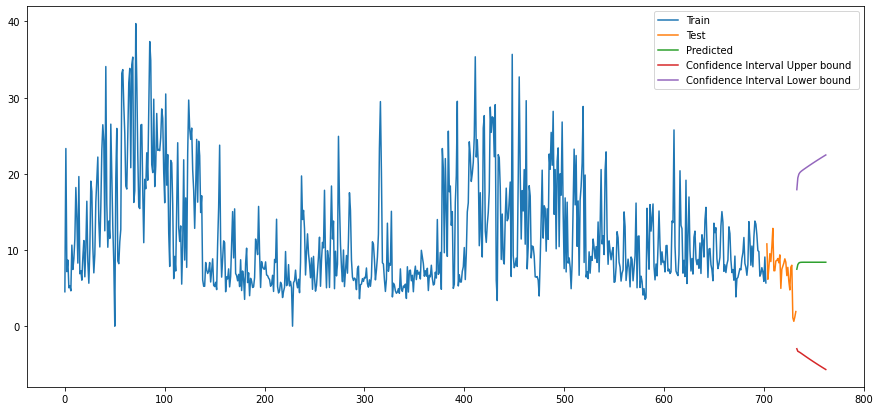

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,7]
plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='Predicted ')
plt.plot(df_conf['Upper_bound'], label='Confidence Interval Upper bound ')
plt.plot(df_conf['Lower_bound'], label='Confidence Interval Lower bound ')
plt.legend(loc='best')
plt.show()

Plot the diagnostic Plot.

**Standardized Residual:** It's a measure of the strength of the difference between observed and expected values.

**Histogram plus estimated density:** KDE is a nonparametric way to estimate the probability density function (PDF) of a random variable.

**Normal Q-Q:** Q-Q plots let you check that the data meet the assumption of normality. They compare the distribution of your data to a normal distribution by plotting the quartiles of your data against the quartiles of a normal distribution. If your data are normally distributed then they should form an approximately straight line.

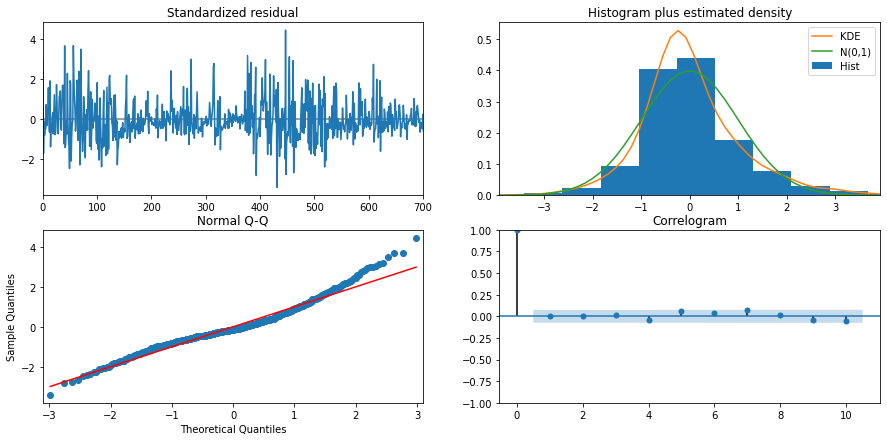

In [ ]:
stepwise_model.plot_diagnostics();

In [ ]:
forecast

,usage_pred
new_index,
733,7.479149
734,8.085656
735,8.290114
736,8.359038
737,8.382273
738,8.390105
739,8.392746
740,8.393636
741,8.393936


In [ ]:
forecast['usage_pred'].mean()

8.348081227289219